In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('../../')

In [4]:
import continuum

In [ ]:
# Load model

In [37]:
checkpoint_path = '../results/boson_4_particles/g15/version_0/_ckpt_epoch_144.ckpt'
model = continuum.Model.load_from_checkpoint(checkpoint_path)

drift_fn = model.drift_fn
state = model.state

14


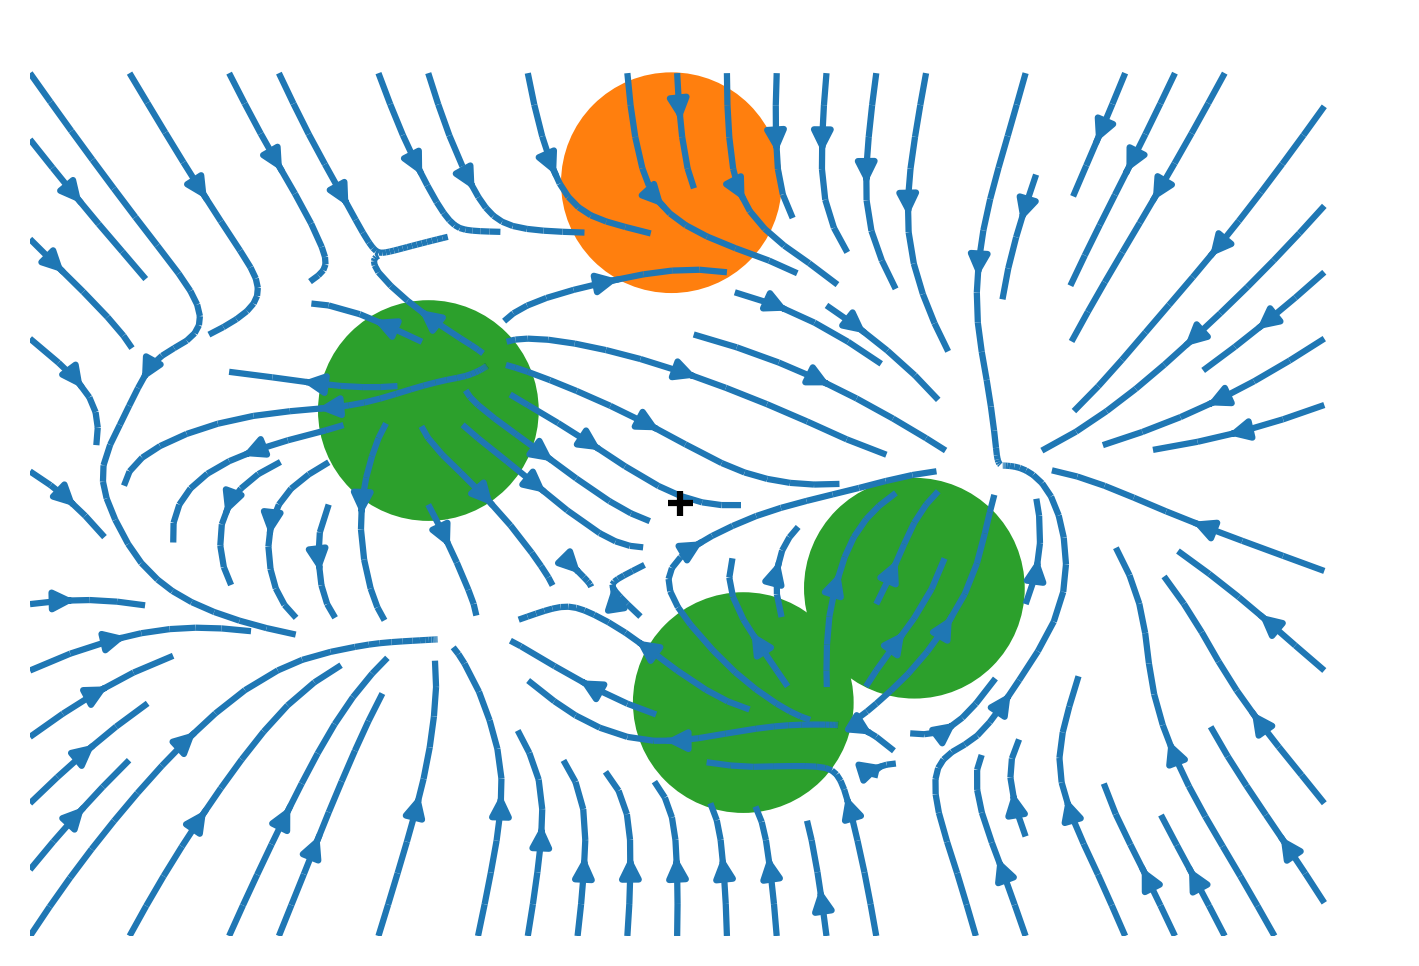

In [122]:
with torch.no_grad():
    fig, ax = plt.subplots(dpi=300)
    
    s = 0.5  #model.hparams.s
    
    # plot particle positions
    n = np.random.randint(state.shape[0])
    print(n)
    state_fix = state[n, 1:, :]
    particle = plt.Circle((state[n, 0, 0], state[n, 0, 1]), s, color='C1')
    ax.add_artist(particle)
    for pos in state_fix:
        particle = plt.Circle((pos[0], pos[1]), s, color='C2')
        ax.add_artist(particle)
    
    # make meshgrid for non-fixed particle
    border = 3
    xmin, xmax, ymin, ymax = -border, border, -2/3*border, 2/3*border
    N = 10
    X, Y = (torch.linspace(xmin, xmax, N), torch.linspace(ymin, ymax, N))
    XX, YY = torch.meshgrid(X, Y)
    
    # make batch where only non-fixed particle varies position
    states = state[n].repeat(N**2, 1, 1)
    states[:, 0, 0] = torch.reshape(XX, (1, N**2))[0]
    states[:, 0, 1] = torch.reshape(YY, (1, N**2))[0]

    # compute drift vector field and reshape to meshgrid shape
    v = drift_fn(states)
    vXX = torch.reshape(v[:, 0, 0], (N, N))
    vYY = torch.reshape(v[:, 0, 1], (N, N))
    
    # plot vector field stream plot
    plt.streamplot(X.numpy(), Y.numpy(), vYY.numpy(), vXX.numpy(), density=1)
    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)
    plt.axis('off')
    ax.set_aspect(aspect='equal')
    plt.scatter([0], [0], c='k', marker='+', zorder=10)
    
    plt.show()
    # plt.savefig("bosons_vector_field.jpg", dpi=300)
    